In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set()

In [2]:
data =  pd.read_csv('Salaries.csv')

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
data_1 = data.drop(['EmployeeName', 'Year', 'Notes', 'Status', 'Agency', 'Id'], axis = 1)

In [5]:
data_1.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19


In [6]:
data_1.isnull().sum()

JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
dtype: int64

In [7]:
data_2 = data_1.fillna(0)

In [8]:
data_2.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19


In [9]:
data_2.describe(include ='all')

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148647,148647.000000,148647.000000,148647.000000,148647.000000,148647.000000,148647.000000
unique,2158,NaN,NaN,NaN,NaN,NaN,NaN
top,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN
freq,7036,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,66056.839853,5066.162130,3648.840936,18925.124008,74771.842919,93696.966927
std,NaN,42885.325380,11454.473535,8056.666489,17165.192395,50515.588970,62791.720208
min,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,NaN,32803.585000,0.000000,0.000000,0.000000,36172.135000,44079.145000
50%,NaN,64863.400000,0.000000,811.350000,23219.660000,71427.510000,92406.220000
75%,NaN,94611.000000,4658.415000,4236.410000,33468.995000,105845.020000,132879.380000


In [10]:
data_2

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19
...,...,...,...,...,...,...,...
148642,Sign Worker,0.00,0.00,0.00,0.0,0.00,0.00
148643,Parking Control Officer,0.00,0.00,0.00,0.0,0.00,0.00
148644,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.0,0.00,0.00
148645,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00


In [11]:
data_3 = data_2.replace('Not Provided', 0)
data_3=data_3.replace('Not provided', 0)

In [12]:
data_3

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19
...,...,...,...,...,...,...,...
148642,Sign Worker,0.00,0.00,0.00,0.0,0.00,0.00
148643,Parking Control Officer,0.00,0.00,0.00,0.0,0.00,0.00
148644,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.0,0.00,0.00
148645,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00


In [13]:
data_3.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19


In [14]:
#  np.unique(data_3[:][0])
print(len(data_3["JobTitle"].unique()))

2158


In [15]:
replacements = {k: i for i, k in enumerate(data_3["JobTitle"].unique(),1)}
print(replacements)

{'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY': 1, 'CAPTAIN III (POLICE DEPARTMENT)': 2, 'WIRE ROPE CABLE MAINTENANCE MECHANIC': 3, 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)': 4, 'ASSISTANT DEPUTY CHIEF II': 5, 'BATTALION CHIEF, (FIRE DEPARTMENT)': 6, 'DEPUTY DIRECTOR OF INVESTMENTS': 7, 'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)': 8, 'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)': 9, 'EXECUTIVE CONTRACT EMPLOYEE': 10, 'DEPARTMENT HEAD V': 11, 'COMMANDER III, (POLICE DEPARTMENT)': 12, 'CAPTAIN, EMERGENCYCY MEDICAL SERVICES': 13, 'ASSISTANT MEDICAL EXAMINER': 14, 'CAPTAIN, FIRE SUPPRESSION': 15, 'CHIEF OF POLICE': 16, 'DEPUTY CHIEF III (POLICE DEPARTMENT)': 17, 'INSPECTOR III, (POLICE DEPARTMENT)': 18, 'ELECTRONIC MAINTENANCE TECHNICIAN': 19, 'ADMINISTRATOR, SFGH MEDICAL CENTER': 20, 'LIEUTENANT III (POLICE DEPARTMENT)': 21, 'FIREFIGHTER': 22, 'NURSING SUPERVISOR PSYCHIATRIC': 23, 'MAYOR': 24, 'LIEUTENANT, FIRE DEPARTMENT': 25, 'INCIDENT SUPPORT SPECIALIST': 26, 'ANESTHETIST': 2

In [16]:
data_3 = data_3.replace(replacements)

In [17]:
data_3.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,1,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19


In [18]:
data_3.describe()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148647.000000,148647.000000,148647.000000,148647.000000,148647.000000,148647.000000,148647.000000
mean,1242.813585,66056.839853,5066.162130,3648.840936,18925.124008,74771.842919,93696.966927
std,568.747126,42885.325380,11454.473535,8056.666489,17165.192395,50515.588970,62791.720208
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,1048.000000,32803.585000,0.000000,0.000000,0.000000,36172.135000,44079.145000
50%,1233.000000,64863.400000,0.000000,811.350000,23219.660000,71427.510000,92406.220000
75%,1705.000000,94611.000000,4658.415000,4236.410000,33468.995000,105845.020000,132879.380000
max,2158.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


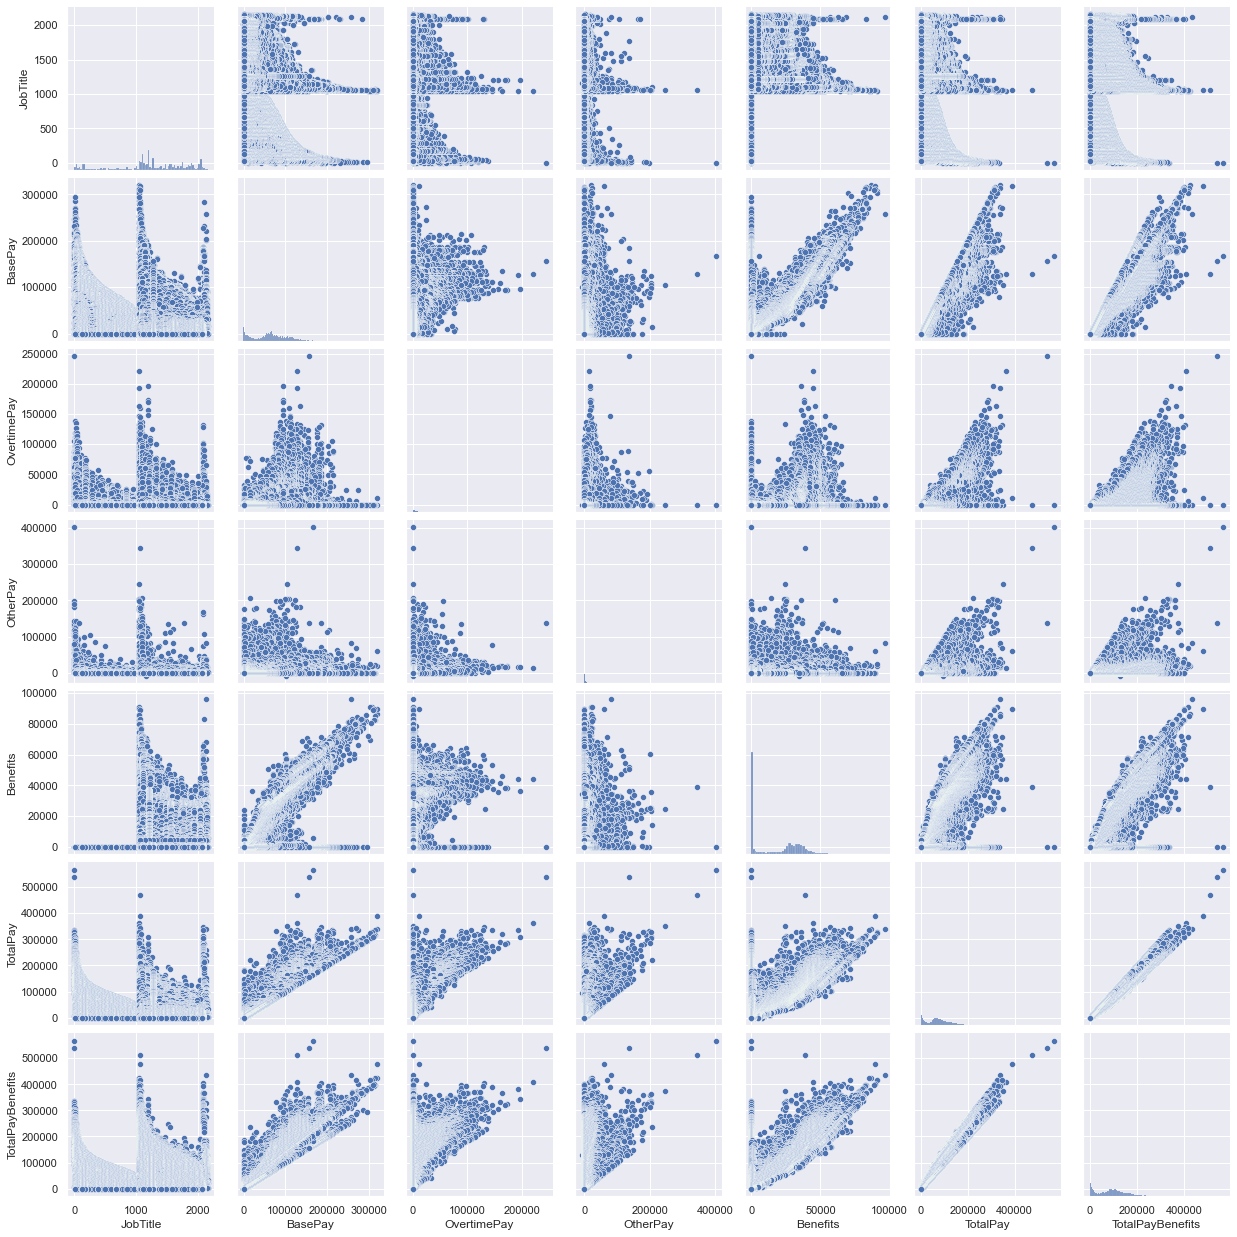

In [19]:
sns.pairplot(data_3)
plt.show()

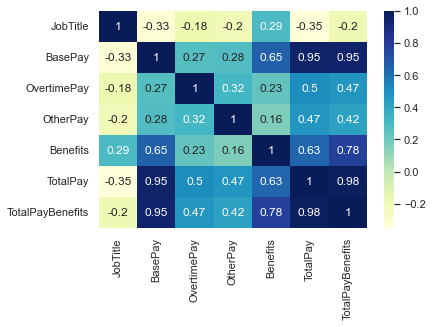

In [20]:
sns.heatmap(data_3.corr(), annot = True, cmap="YlGnBu")
plt.show()

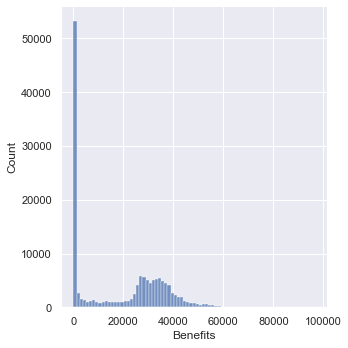

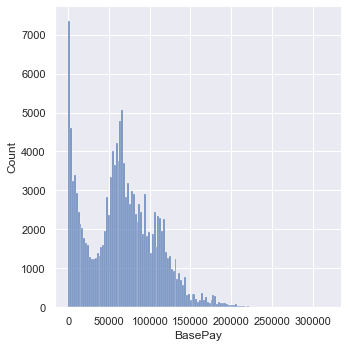

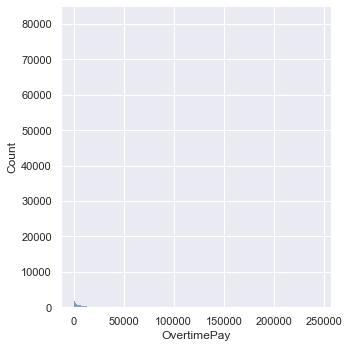

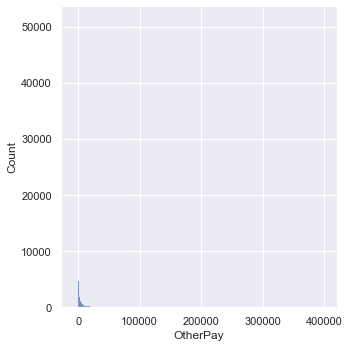

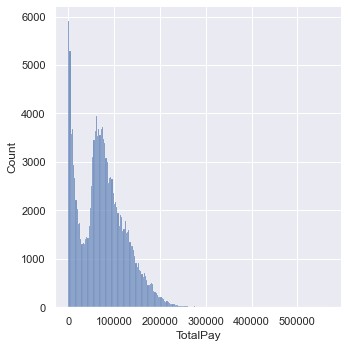

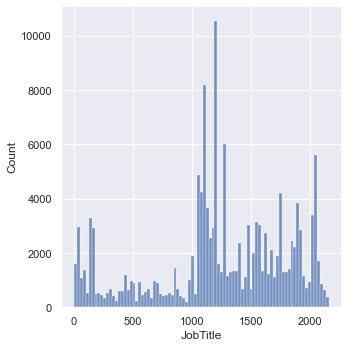

In [21]:
sns.displot(data_3['Benefits'])
sns.displot(data_3['BasePay'])
sns.displot(data_3['OvertimePay'])
sns.displot(data_3['OtherPay'])
sns.displot(data_3['TotalPay'])
sns.displot(data_3['JobTitle'])
plt.show()

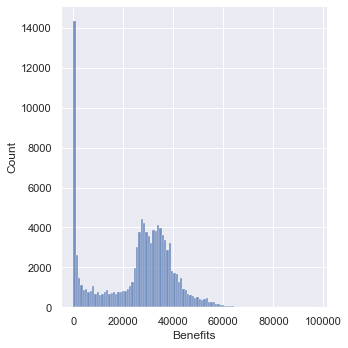

In [22]:
q = data_3['Benefits'].quantile(0.12)
data_4 = data_3[data_3['Benefits'] > q]
sns.displot(data_4['Benefits'])
plt.show()

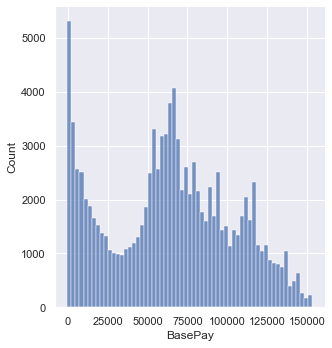

In [23]:
r = data_4['BasePay'].quantile(0.97)
data_5 = data_4[data_4['BasePay'] < r]
sns.displot(data_5['BasePay'])
plt.show()

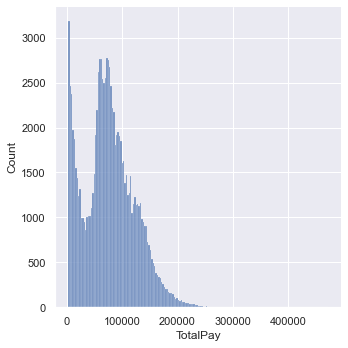

In [24]:
t = data_5['TotalPay'].quantile(0.05)
data_6 = data_5[data_5['TotalPay'] > t]
sns.displot(data_6['TotalPay'])
plt.show()

In [25]:
data_6.shape

(102055, 7)

In [26]:
y = data_6.pop('TotalPayBenefits')
x = data_6

In [27]:
x

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay
36159,1046,128808.87,220909.48,13126.31,44430.12,362844.66
36161,1048,111921.00,146415.32,78057.41,53102.29,336393.73
36163,1050,126863.19,192424.49,17917.18,44438.25,337204.86
36167,1053,104404.00,0.00,245999.41,24287.23,350403.41
36173,1056,124573.50,22599.60,180516.68,32381.00,327689.78
...,...,...,...,...,...,...
146809,1570,2634.00,0.00,122.92,13.52,2756.92
146810,2073,2740.00,0.00,0.00,27.40,2740.00
146811,1930,2738.70,0.00,0.00,27.39,2738.70
146812,1930,2736.02,0.00,0.86,27.37,2736.88


In [28]:
X = sm.add_constant(x)
results = sm.OLS(y,X).fit()
results.summary()

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.692e+33
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:27:38   Log-Likelihood:             2.2109e+06
No. Observations:              102055   AIC:                        -4.422e+06
Df Residuals:                  102049   BIC:                        -4.422e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.001e-11   2.26e-12     13.276      0.000    2.56e-11    3.44e-11
JobTitle    -7.638e-14   1.19e-15    -64.098      0.000   -7.87e-14    -7.4e-14
BasePay         0.2500   1.92e-17    1.3e+16      0.000       0.250       0.250
OvertimePay     0.2500   2.48e-17   1.01e+16      0.000       0.250       0.250
OtherPay        0.2500   3.31e-17   7.56e+15      0.000       0.250       0.250
Benefits        1.0000   5.12e-17   1.95e+16      0.000       1.000       1.000
TotalPay        0.7500   1.18e-17   6.34e+16      0.000       0.750       0.750
==============================================================================
Omnibus:                    41474.315   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454749.832
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                      12.800   Cond. No.                     6.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
variables = data_6
vif = pd.DataFrame()

In [30]:
vif ["VIF"] = [variance_inflation_factor (variables.values, i) for i in range(variables.shape[1])]

F:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [31]:
vif ["features"] = variables.columns

In [32]:
vif

,VIF,features
0,3.012083,JobTitle
1,inf,BasePay
2,inf,OvertimePay
3,inf,OtherPay
4,25.513142,Benefits
5,inf,TotalPay


In [51]:
a = x.drop(['BasePay', 'Benefits'],  axis = 1)

In [52]:
variables = a
vif = pd.DataFrame()
vif ["VIF"] = [variance_inflation_factor (variables.values, i) for i in range(variables.shape[1])]
vif ["features"] = variables.columns
vif

,VIF,features
0,2.764440,JobTitle
1,1.807886,OvertimePay
2,1.583192,OtherPay
3,4.756490,TotalPay


In [53]:
X1 = sm.add_constant(a)
results = sm.OLS(y,X1).fit()
results.summary()

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.551e+06
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:31:41   Log-Likelihood:            -1.0286e+06
No. Observations:              102055   AIC:                         2.057e+06
Df Residuals:                  102050   BIC:                         2.057e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2873.9680    137.806    -20.855      0.000   -3144.066   -2603.870
JobTitle        3.3228      0.072     46.119      0.000       3.182       3.464
OvertimePay    -0.2750      0.002   -149.573      0.000      -0.279      -0.271
OtherPay       -0.4049      0.003   -159.107      0.000      -0.410      -0.400
TotalPay        1.3475      0.001   2219.123      0.000       1.346       1.349
==============================================================================
Omnibus:                    20946.208   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96985.942
Skew:                          -0.933   Prob(JB):                         0.00
Kurtosis:                       7.396   Cond. No.                     6.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
m_train , m_test , n_train , n_test = train_test_split(a , y , test_size = 0.2)

In [55]:
reg = LinearRegression()
reg.fit(m_train , n_train)

LinearRegression()

In [56]:
y_hat = reg.predict(m_test)
y_hat.shape , m_test.shape

((20411,), (20411, 4))

In [57]:
r2_score(n_test , y_hat)

0.9900232083776258

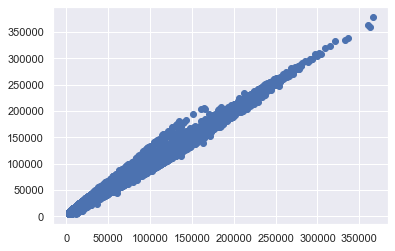

In [58]:
plt.scatter(n_test,y_hat)

In [59]:
w = (3.3228*m_test['JobTitle']) + (1.3475*m_test['TotalPay']) + (-0.2750*m_test['OvertimePay']) + (-0.4049*m_test['OtherPay'])

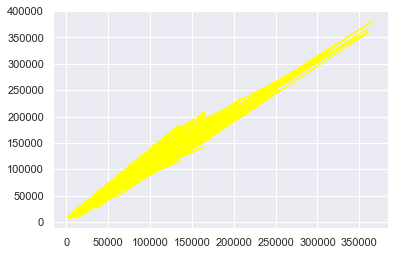

In [60]:
plt.plot(n_test, w , c = 'yellow')